<a href="https://colab.research.google.com/github/GurvaTaulus/HelloMachineLearning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen0725/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen0725/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7e1b54c04310>)

In [117]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
datas_predict = pd.read_csv("test.csv", encoding="utf-8")
datas_total = pd.concat([datas,datas_predict],axis=0)
datas_total = datas_total.drop(["Survived","PassengerId"],axis=1)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [118]:
# demo: pandas.concat
# d1 = pd.DataFrame([
#     [1,2],
#     [3,4]
# ])
# d2 = pd.DataFrame([
#     [5,6],
#     [7,8]
# ])
# pd.concat([d1, d2],axis=0)

In [119]:
# demo:
# import random
# if random.randint(0,1) == 0:
#   b = int
# else:
#   b = round
# b(4.6)

In [120]:
# 轉換: Series(1D), apply(函式型態)
# Demo: apply
# s = pd.Series([1, 2, 3, 4])
# def func(n):
#   return n**2
# s.apply(func)
def name(n):
  # n = "Braund, Mr. Owen Harris"
  return n.split(",")[1].split(".")[0].strip()
datas_total["Name"] = datas_total["Name"].apply(name)

In [121]:
# value_counts()
counts = datas_total["Ticket"].value_counts()
def ticket(t):
  return counts[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)

In [122]:
def cabin(c):
  if pd.isna(c):
    return c
  else:
    return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)

中場休息  
  類別型態: Pclass, Name, Sex, Cabin, Embarked  
  數值類型: Age, SibSp, Parch, Ticket, Fare  
遇到NaN值時  
  類別型態: 補最常出現值  
  數值類型: 補中位數  

In [123]:
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [124]:
# demo: 篩選操作 Series/DataFrame[帶入跟資料筆數一樣多的T/F]
# d = pd.DataFrame([
#     [1,2],
#     [3,4],
#     [5,6]
# ])
# d[[True,False,True]]

In [125]:
most = datas_total["Embarked"].value_counts().idxmax()
datas_total["Embarked"] = datas_total["Embarked"].fillna(most)

In [126]:
med = datas_total.median(numeric_only=True).drop("Pclass")
datas_total = datas_total.fillna(med)

In [128]:
c = datas_total["Name"].value_counts()
reserved = c[c > 50].index
def name2(n):
  if n in reserved:
    return n
  else:
    return None
datas_total["Name"] = datas_total["Name"].apply(name2)

In [ ]:
datas_total = pd.get_dummies(datas_total)
datas_total = pd.get_dummies(datas_total, columns=["Pclass"])

<!--  -->
可不做one-hot encodeing
1. 有大小關係的類別
2. 二值型類別

In [132]:
datas_total["Family"] = datas_total["SibSp"] + datas_total["Parch"]

In [133]:
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


<!-- KNN -->  
KNN  
K Nearest Neighbors  
求K個距離最近鄰居  
1. 先將各欄位Scaling(Normalize)
2. Scaling method
  2.1. MinMax Scaling  
  2.2. Robust Scaling  
  2.3. Standard Scaling  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total), columns = datas_total.columns)
datas_total_scaled

In [146]:
# 取列: iloc loc
x = datas_total.iloc[:len(datas)]
x_predict = datas_total.iloc[len(datas):]

In [147]:
x_scaled = datas_total_scaled.iloc[:len(datas)]
x_predict_scaled = datas_total_scaled.iloc[len(datas):]

In [150]:
y = datas["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2,20)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scaled, y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [158]:
# 靠賽的話是11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled, y)
pre = clf.predict(x_predict_scaled)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)

In [160]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# !!回家可以擴大範圍
params = {
    "n_estimators":range(21, 50, 2),
    "max_depth":range(4, 9)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

0.8428838951310862
{'max_depth': 6, 'n_estimators': 47}


In [161]:
clf = RandomForestClassifier(n_estimators=31, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)

[Text(0.4583333333333333, 0.875, 'Sex_male <= 0.5\ngini = 0.456\nsamples = 552\nvalue = [578, 313]\nclass = Victim'),
 Text(0.25, 0.625, 'Cabin_D <= 0.5\ngini = 0.433\nsamples = 187\nvalue = [93, 200]\nclass = Survivor'),
 Text(0.16666666666666666, 0.375, 'Pclass_3 <= 0.5\ngini = 0.452\nsamples = 173\nvalue = [93, 177]\nclass = Survivor'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [0, 23]\nclass = Survivor'),
 Text(0.6666666666666666, 0.625, 'Age <= 13.0\ngini = 0.307\nsamples = 365\nvalue = [485, 113]\nclass = Victim'),
 Text(0.5, 0.375, 'SibSp <= 2.5\ngini = 0.439\nsamples = 19\nvalue = [13, 27]\nclass = Survivor'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.375, 'Cabin_E <= 0.5\ngini = 0.261\nsamples = 346\nvalue = [472, 86]\nclass = Victim'),
 Text(0.75, 0.125, '\n  (...)  \n'),
 Tex

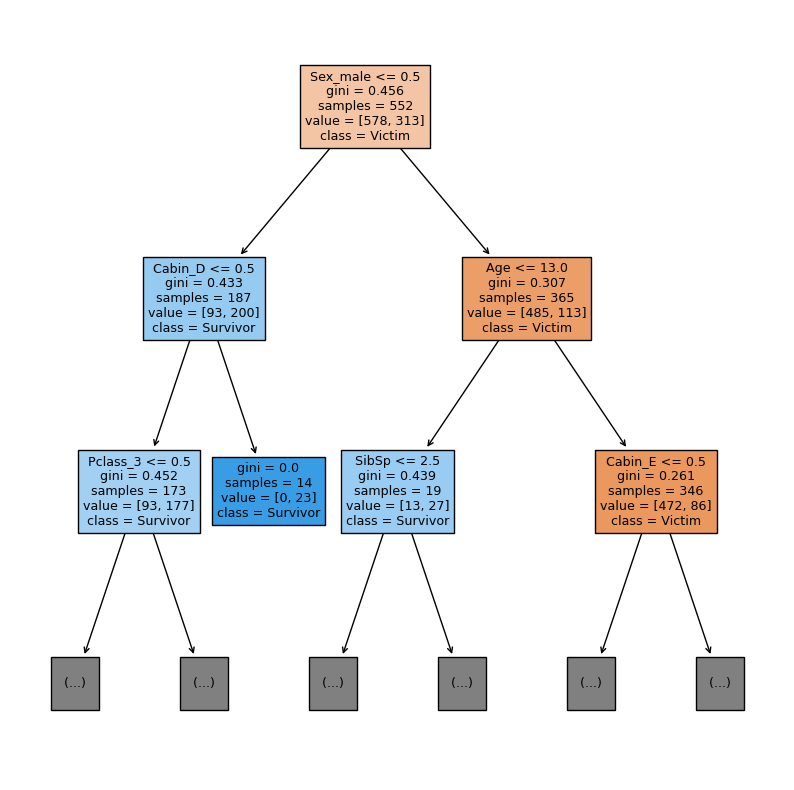

In [165]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
# 0~30
plot_tree(clf.estimators_[2],
     feature_names=x.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

<Axes: xlabel='Sex', ylabel='count'>

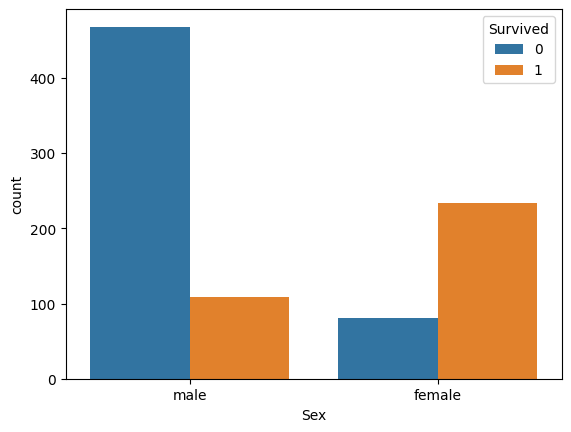

In [163]:
imp = pd.Series(clf.feature_importances_, index=x.columns)
imp.sort_values(ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=datas["Sex"],
       hue=datas["Survived"])

title

axis

label(x, y軸標籤)

ticks(刻度)

legend(圖例)

In [ ]:
c = pd.cut(datas["Fare"], bins=15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

In [ ]:
c = pd.cut(datas["Age"], bins=15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")